In [2]:
version()

'SageMath version 9.3, Release Date: 2021-05-09'

In [3]:
%display latex

Definimos una variedad $M$ tipo Lorentziana, dimensión 4 y un sistema de coordenadas esféricas $X$.

In [9]:
M=Manifold(4,'M', structure='Lorentzian')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')
X

Chart (M, (t, r, th, ph))

Definimos una aplicación de M a R3

In [13]:
#variedad R3
    R3=Manifold(3,'R^3', latex_name=r'\mathbb{R}^3') 
#carta en R3
    X3.<x,y,z>=R3.chart() 

#La aplicación se llama "to_R3". Entre los corchetes se
#escribe X3_i(X)
    to_R3=M.diff_map(R3, {(X,X3): [r*sin(th)*cos(ph),
                                  r*sin(th)*sin(ph), r*cos(th)]})
to_R3.display()

M --> R^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

Definimos la métrica de Shwarzschild

In [15]:
#métrica g en la variedad M
    g=M.metric()
#definimos la variable m. Esta representa la masa gravitacional sentida
#por un observador localizado a grandes valores de r (Gorgoulhon p127)
    m=var('m'); assume (m>=0) 
#definimos cada una de las componentes g en la carta X
    g[0,0],g[1,1]=-(1-2*m/r),1/(1-2*m/r)
    g[2,2],g[3,3]=r^2,(r*sin(th))^2
    g.display()


g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

Para definir la geodésica, definimos un punto inicial y un vector tangente

In [16]:
#punto p0 en t=0, r=0.8m, theta=pi/2, phi=10^-12
    p0=M.point((0,8*m,pi/2,1e-12),name='p_0')  

#vector del espacio tangente en p0. v0=1.3, v1=v2=0, v3=0.06/m
    v0=M.tangent_space(p0)((1.297513,0,0,0.0640625/m), name='v_0')
    v0.display()

v_0 = 1.29751300000000 d/dt + 0.0640625000000000/m d/dph

Declaramos una geodésica con estas condiciones iniciales denotando por $s$ el parámetro afín (tiempo propio), con $(s_{min},s_{max})=(0,1500m)$

In [22]:
#declaramos la el parámetro afín s como una variable
s=var('s')

#(métrica,parám. afin, smin, smax, vector tangente de inicio)
geod=M.integrated_geodesic(g,(s,0,1500),v0)
geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

In [23]:

geod.display()

(0, 1500) --> M

In [24]:
display(geod)

Integrated geodesic in the 4-dimensional Lorentzian manifold M

## Geodésica integrada en la variedad Lorentziana $M$ 4-dimensional

In [37]:
#integración numérica
sol = geod.solve(parameters_values={m: 1}) 
    
#Interpolación de la solución para el ploteo
interp=geod.interpolate()
#Ploteando la geodésica. Se utiliza la carta X3, para llegar a ella, se utiliza
#la aplicación to_R3. Se plotean 500 puntos, espesor 2, sin etiquetar los ejes.
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500,
                           thickness=2, label_axes=False)
#más parámetros de la gráfica. El punto de inicio:
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1})
        
#El horizonte de eventos en el origen de coordenadas representado como una esfera
graph += sphere(size=2, color='grey')
show(graph, viewer='threejs', online=True)

Graphics3d Object

Tachyon view

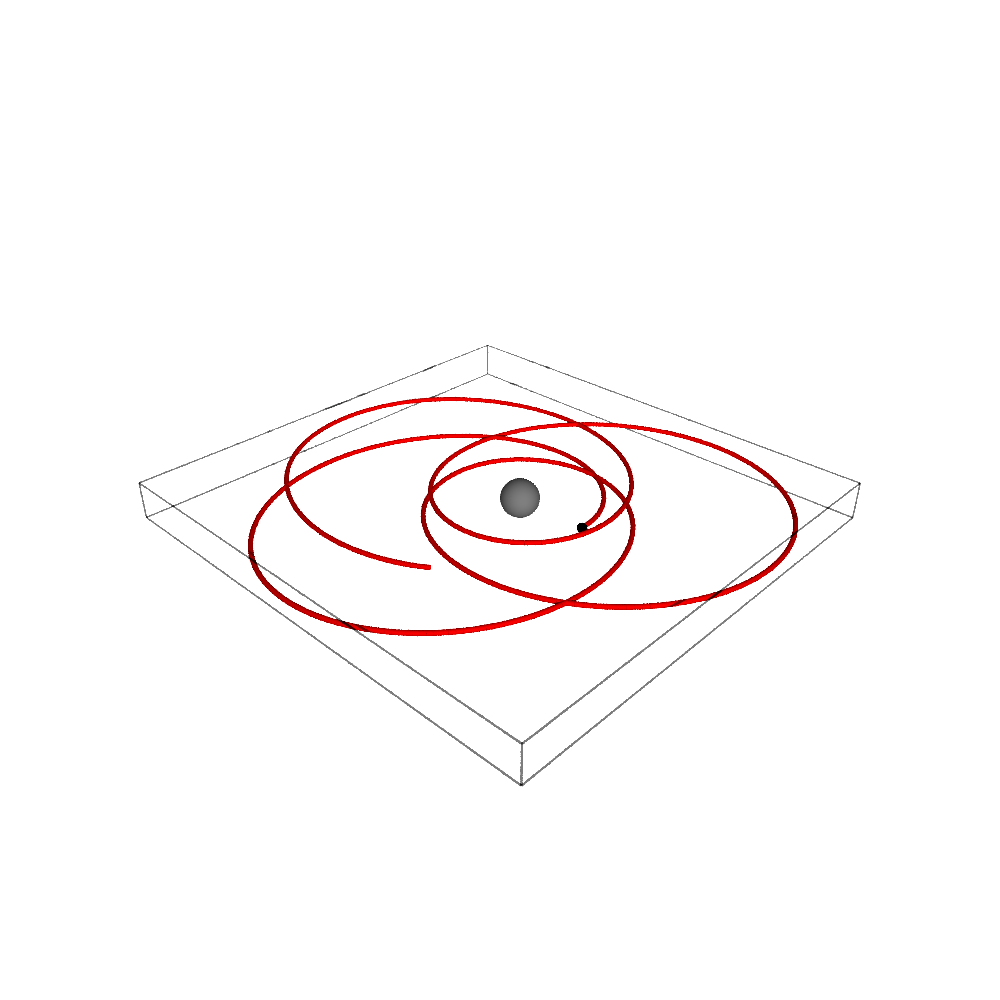

In [38]:
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Detalles de la solución

In [39]:
geod.system(verbose=True)

Geodesic in the 4-dimensional Lorentzian manifold M equipped with Lorentzian metric g on the 4-dimensional Lorentzian manifold M, and integrated over the Real interval (0, 1500) as a solution to the following geodesic equations, written with respect to Chart (M, (t, r, th, ph)):

Initial point: Point p_0 on the 4-dimensional Lorentzian manifold M with coordinates [0, 8*m, 1/2*pi, 1.00000000000000e-12] with respect to Chart (M, (t, r, th, ph))
Initial tangent vector: Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M with components [1.29751300000000, 0, 0, 0.0640625000000000/m] with respect to Chart (M, (t, r, th, ph))

d(t)/ds = Dt
d(r)/ds = Dr
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dt)/ds = 2*Dr*Dt*m/(2*m*r - r^2)
d(Dr)/ds = -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4)
d(Dth)/ds = (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r
d(Dph)/ds = -2*(Dph*Dth*

[[2*Dr*Dt*m/(2*m*r - r^2),
  -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4),
  (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r,
  -2*(Dph*Dth*r*cos(th) + Dph*Dr*sin(th))/(r*sin(th))],
 Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M,
 Chart (M, (t, r, th, ph))]

Símbolos de Christoffel de la métrica g:

In [45]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

Tensor de riemann en X

In [46]:
g.riemann().display()

Riem(g) = -2*m/(2*m*r^2 - r^3) d/dt*dr*dt*dr + 2*m/(2*m*r^2 - r^3) d/dt*dr*dr*dt - m/r d/dt*dth*dt*dth + m/r d/dt*dth*dth*dt - m*sin(th)^2/r d/dt*dph*dt*dph + m*sin(th)^2/r d/dt*dph*dph*dt - 2*(2*m^2 - m*r)/r^4 d/dr*dt*dt*dr + 2*(2*m^2 - m*r)/r^4 d/dr*dt*dr*dt - m/r d/dr*dth*dr*dth + m/r d/dr*dth*dth*dr - m*sin(th)^2/r d/dr*dph*dr*dph + m*sin(th)^2/r d/dr*dph*dph*dr + (2*m^2 - m*r)/r^4 d/dth*dt*dt*dth - (2*m^2 - m*r)/r^4 d/dth*dt*dth*dt - m/(2*m*r^2 - r^3) d/dth*dr*dr*dth + m/(2*m*r^2 - r^3) d/dth*dr*dth*dr + 2*m*sin(th)^2/r d/dth*dph*dth*dph - 2*m*sin(th)^2/r d/dth*dph*dph*dth + (2*m^2 - m*r)/r^4 d/dph*dt*dt*dph - (2*m^2 - m*r)/r^4 d/dph*dt*dph*dt - m/(2*m*r^2 - r^3) d/dph*dr*dr*dph + m/(2*m*r^2 - r^3) d/dph*dr*dph*dr - 2*m/r d/dph*dth*dth*dph + 2*m/r d/dph*dth*dph*dth

Listado de las componentes del tensor de Riemman.

In [47]:
g.riemann().display_comp()

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_r,r,t = 2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_th,th,t = m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^t_ph,ph,t = m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_t,r,t = 2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_th,th,r = m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^r_ph,ph,r = m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_t,th,t = -(2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_r,th,r = m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^th_ph,ph,th = -2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_t,ph,t = -(2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_r,ph,r = m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r 
Riem(g)^ph_th,ph,th = 2*m/r